In [1]:
!pip install -q pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 95.0 MB/s eta 0:00:00
   ━━

In [2]:
import pycaret
from pycaret.datasets import get_data

In [3]:
dataset = get_data('satellite')
target = 'Class'

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [4]:
from pycaret.classification import *
class_exp = ClassificationExperiment()
class_exp.setup(dataset, target=target)

,Description,Value
0,Session id,1889
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5"
4,Original data shape,"(6435, 37)"
5,Transformed data shape,"(6435, 37)"
6,Transformed train set shape,"(4504, 37)"
7,Transformed test set shape,"(1931, 37)"
8,Numeric features,36
9,Preprocess,True


In [5]:
model = class_exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9136,0.9911,0.9136,0.9124,0.9107,0.8929,0.8937,0.5180
xgboost,Extreme Gradient Boosting,0.9134,0.9909,0.9134,0.9123,0.9113,0.8928,0.8933,1.0660
lightgbm,Light Gradient Boosting Machine,0.9121,0.9912,0.9121,0.9104,0.9099,0.8912,0.8916,3.7790
rf,Random Forest Classifier,0.9074,0.9903,0.9074,0.9058,0.9039,0.8852,0.8861,1.0620
knn,K Neighbors Classifier,0.8999,0.9811,0.8999,0.8988,0.8987,0.8762,0.8765,0.1400
gbc,Gradient Boosting Classifier,0.8983,0.0000,0.8983,0.8964,0.8959,0.8741,0.8746,10.5400
qda,Quadratic Discriminant Analysis,0.8512,0.0000,0.8512,0.8353,0.8334,0.8149,0.8179,0.0870
dt,Decision Tree Classifier,0.8461,0.9069,0.8461,0.8464,0.8452,0.8100,0.8104,0.1880
lda,Linear Discriminant Analysis,0.8326,0.0000,0.8326,0.8269,0.8249,0.7916,0.7936,0.0650
lr,Logistic Regression,0.8037,0.0000,0.8037,0.7861,0.7839,0.7551,0.7590,1.9140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

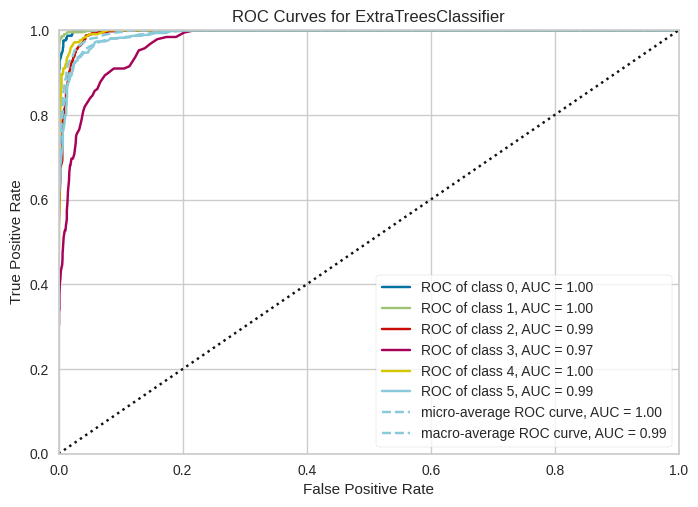

In [6]:
class_exp.plot_model(model)

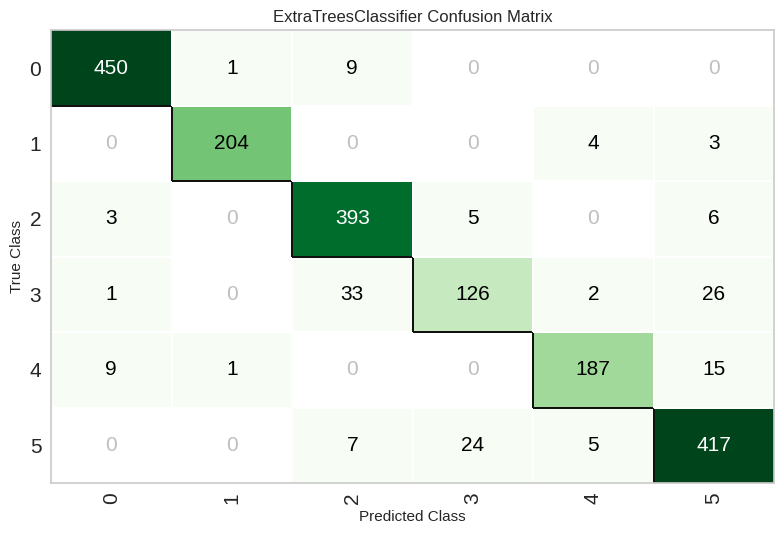

In [7]:
class_exp.plot_model(model, plot='confusion_matrix')

In [8]:
class_exp.evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [9]:
prediction = class_exp.predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9202,0.9937,0.9202,0.9195,0.9187,0.9012,0.9016


In [10]:
prediction.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class,prediction_label,prediction_score
3382,59,60,82,68,59,60,82,68,59,57,...,59,78,68,60,59,82,68,5,5,0.96
300,93,111,114,90,89,106,114,83,89,106,...,112,113,92,92,112,118,92,3,3,1.00
148,85,111,114,87,89,106,114,87,89,106,...,103,113,85,88,103,108,85,3,3,0.89
4519,55,51,81,71,59,61,81,67,67,79,...,54,79,68,52,57,79,64,5,5,0.94
1494,67,106,114,97,67,102,105,87,63,88,...,112,118,96,68,95,113,88,1,1,0.99


In [11]:
class_exp.save_model(model, 'Satellite pipeline')
pipeline = class_exp.load_model('Satellite pipeline')
pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Attribute1', 'Attribute2',
                                             'Attribute3', 'Attribute4',
                                             'Attribute5', 'Attribute6',
                                             'Attribute7', 'Attribute8',
                                             'Attribute9', 'Attribute10...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=1889, verbose=0,
                                      warm_start=False))],
         verbose=False)